# EDA(인사이트 도출 목적)
---

## 라이브러리 import

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# 경고 메세지 삭제
import warnings
warnings.filterwarnings('ignore')

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

## 데이터 로드

In [3]:
## 기본데이터
df_ori = pd.read_excel('../datasets/movie_1.xlsx')
df_raw = pd.read_csv('../datasets/RAWDATA(0321).csv', index_col=0)
df_stan = pd.read_csv('../datasets/stan_RAW.csv', index_col=0)

In [ ]:
df_부실징후_outlier = df_EDA
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"

ncols = 5
nrows = 17

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 100))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()

In [14]:
df_raw

,영화명,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,...,로그 전국스크린수,로그 전국매출액,로그 서울매출액,로그 전국관객수,로그 서울관객수,로그 개봉일관객수,로그 개봉일매출액,로그 개봉일매출비율,로그 배우가중치,로그 감독가중치
0,명량,2014-07-30,1.0,1587,135748398910,17613682,3.312123e+10,4163666,사극,1,...,7.369601,25.634069,24.223440,16.684187,15.241906,13.433812,22.272716,4.120662,3.663562,0.693147
1,극한직업,2019-01-23,1.0,1978,139647979516,16264944,3.185866e+10,3638287,코미디,1,...,7.589842,25.662391,24.184575,16.604523,15.107024,12.817418,21.823465,4.293195,3.044522,1.098612
2,신과함께-죄와 벌,2017-12-20,1.0,1912,115698654137,14410754,2.753083e+10,3346172,판타지,2,...,7.555905,25.474255,24.038572,16.483485,15.023328,12.915007,21.816581,4.146304,3.295837,1.098612
3,국제시장,2014-12-17,1.0,966,110828014630,14245998,2.584252e+10,3233946,드라마,2,...,6.873164,25.431245,23.975287,16.471987,14.989214,12.126791,21.028446,3.433987,3.367296,0.000000
4,어벤져스: 엔드게임,2019-04-24,0.0,2835,122182694160,13934592,3.357714e+10,3597963,액션,2,...,7.949797,25.528783,24.237111,16.449885,15.095878,14.107231,22.993223,4.575741,3.091042,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,스파이 브릿지,2015-11-05,0.0,425,2015360478,260721,7.222464e+08,90018,스릴러,2,...,6.052089,21.424064,20.397877,12.471206,11.407765,9.820323,18.722845,1.722767,-1.098612,-2.302585
910,함정,2015-09-10,1.0,445,2088685200,257716,4.114176e+08,50477,스릴러,0,...,6.098074,21.459801,19.835119,12.459613,10.829273,10.382110,19.337994,2.572612,-0.456758,-3.401197
911,파이널 데스티네이션5,2011-09-08,0.0,168,2370348500,257193,8.800060e+08,87499,공포(호러),0,...,5.123964,21.586303,20.595439,12.457582,11.379383,9.442483,18.586471,2.014903,-3.401197,-2.708050
912,언브로큰,2015-01-07,0.0,401,1997947292,256475,6.057764e+08,75489,액션,1,...,5.993961,21.415386,20.222021,12.454786,11.231742,10.192681,19.110815,1.757858,-1.455287,-3.401197


In [15]:
df_raw.columns

Index(['영화명', '개봉일', '국적', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '장르',
       '등급', '영화구분', '개봉연도', '평균 제작비', '국내배급사', '상장배급사', '주요배급사', '개봉일관객수',
       '개봉일매출액', '개봉일매출비율', '타겟', '배우가중치', '감독가중치', '로그 전국스크린수', '로그 전국매출액',
       '로그 서울매출액', '로그 전국관객수', '로그 서울관객수', '로그 개봉일관객수', '로그 개봉일매출액',
       '로그 개봉일매출비율', '로그 배우가중치', '로그 감독가중치'],
      dtype='object')

In [16]:
RAW = df_raw.drop(columns=['영화명', '개봉일', '영화구분', '장르', '평균 제작비', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '개봉일관객수', '개봉일매출액', '개봉일매출비율', '배우가중치', '감독가중치'], axis=1)

In [18]:
dummie = pd.DataFrame(pd.get_dummies(RAW['등급']))

In [20]:
RAW = pd.concat([RAW, dummie], axis=1)

In [22]:
RAW.drop(columns=['등급'], axis=1, inplace=True)

In [24]:
RAW.to_csv('./datasets/RAW_Log.csv')

In [4]:
df_ori['영화구분'].value_counts()

일반영화       8287
독립/예술영화    3551
Name: 영화구분, dtype: int64

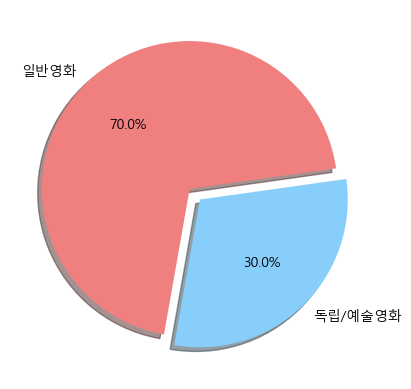

In [59]:
ratio = [8287, 3551]
labels = ['일반영화', '독립/예술영화']
explode = [0.05, 0.05]
colors = ['#F08080', '#87CEFA']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [47]:
df_raw['영화구분'].value_counts()

1    878
0     36
Name: 영화구분, dtype: int64

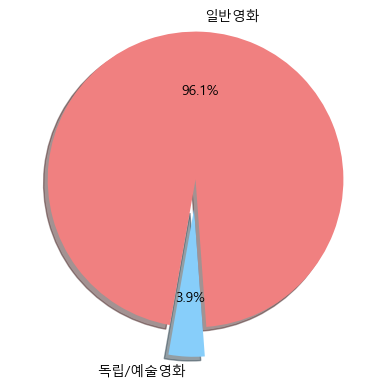

In [57]:
ratio = [878, 36]
labels = ['일반영화', '독립/예술영화']
explode = [0.1, 0.1]
colors = ['#F08080', '#87CEFA']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [7]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11838 entries, 0 to 11837
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순번      11838 non-null  int64         
 1   영화명     11838 non-null  object        
 2   감독      11516 non-null  object        
 3   제작사     3548 non-null   object        
 4   수입사     8442 non-null   object        
 5   배급사     11819 non-null  object        
 6   개봉일     11838 non-null  datetime64[ns]
 7   영화유형    11838 non-null  object        
 8   영화형태    11837 non-null  object        
 9   국적      11838 non-null  object        
 10  전국스크린수  11838 non-null  int64         
 11  전국매출액   11838 non-null  int64         
 12  전국관객수   11838 non-null  int64         
 13  서울매출액   11831 non-null  float64       
 14  서울관객수   11838 non-null  int64         
 15  장르      11771 non-null  object        
 16  등급      11838 non-null  object        
 17  영화구분    11838 non-null  object        
dtypes: dat

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 913
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영화명      914 non-null    object 
 1   개봉일      914 non-null    object 
 2   국적       914 non-null    float64
 3   전국스크린수   914 non-null    int64  
 4   전국매출액    914 non-null    int64  
 5   전국관객수    914 non-null    int64  
 6   서울매출액    914 non-null    float64
 7   서울관객수    914 non-null    int64  
 8   장르       914 non-null    object 
 9   등급       914 non-null    int64  
 10  영화구분     914 non-null    int64  
 11  개봉연도     914 non-null    int64  
 12  평균 제작비   914 non-null    float64
 13  국내배급사    914 non-null    float64
 14  상장배급사    914 non-null    float64
 15  주요배급사    914 non-null    int64  
 16  개봉일관객수   914 non-null    float64
 17  개봉일매출액   914 non-null    float64
 18  개봉일매출비율  914 non-null    float64
 19  타겟       914 non-null    int64  
 20  배우가중치    914 non-null    float64
 21  감독가중치    914 non

In [67]:
df_ori['장르'].value_counts().sum()

11693

In [48]:
genre = {
    "멜로/로맨스" : "멜로/로맨스",
    "드라마" : "드라마",
    "성인물(에로)" : "성인물(에로)",
    "액션" : "액션",
    "애니메이션" : "애니메이션",
    "코미디" : "코미디",
    "범죄": '기타',
    "스릴러": '기타',
    "공포(호러)": '기타',
    "SF": '기타',
    "사극" : '기타',
    "어드벤처" : '기타',
    "미스터리" : '기타',
    "판타지" : '기타',
    "판타지" :'기타',
    "전쟁" : '기타',
    "다큐멘터리" : '기타',
    "뮤지컬" : '기타',
    "가족" : '기타',
    "공연" : '기타'
}

df_ori['장르'] = df_ori['장르'].map(genre)

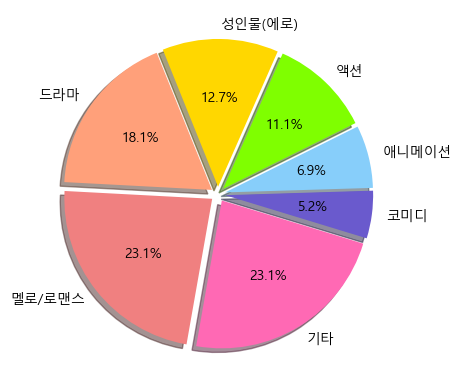

In [50]:
ratio = [2697, 2112, 1485, 1293, 801, 608, 2697]
labels = ['멜로/로맨스', '드라마', '성인물(에로)', '액션', '애니메이션', '코미디', '기타']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#F08080', '#FFA07A', '#FFD700', '#7FFF00', '#87CEFA', '#6A5ACD', '#FF69B4']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

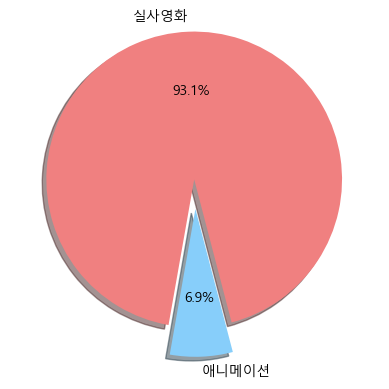

In [68]:
ratio = [10892, 801]
labels = ['실사영화', '애니메이션']
explode = [0.1, 0.1]
colors = ['#F08080', '#87CEFA']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [51]:
genre = {
    "멜로/로맨스" : "멜로/로맨스",
    "드라마" : "드라마",
    "범죄": '범죄',
    "액션" : "액션",
    "애니메이션" : "애니메이션",
    "코미디" : "코미디",

    "성인물(에로)" : "기타",
    "스릴러": '기타',
    "공포(호러)": '기타',
    "SF": '기타',
    "사극" : '기타',
    "어드벤처" : '기타',
    "미스터리" : '기타',
    "판타지" : '기타',
    "판타지" :'기타',
    "전쟁" : '기타',
    "다큐멘터리" : '기타',
    "뮤지컬" : '기타',
    "가족" : '기타',
    "공연" : '기타'
}

df_raw['장르'] = df_raw['장르'].map(genre)

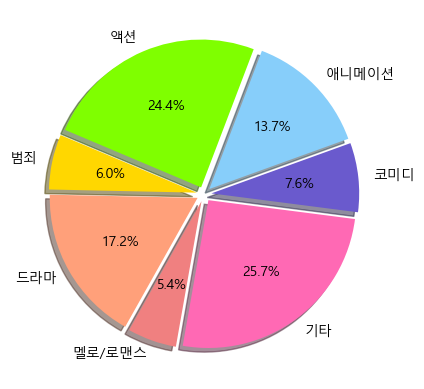

In [53]:
ratio = [49, 157, 55, 223, 125, 69, 235]
labels = ['멜로/로맨스', '드라마', '범죄', '액션', '애니메이션', '코미디', '기타']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#F08080', '#FFA07A', '#FFD700', '#7FFF00', '#87CEFA', '#6A5ACD', '#FF69B4']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

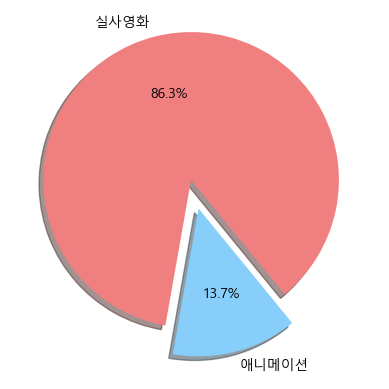

In [70]:
ratio = [788, 125]
labels = ['실사영화', '애니메이션']
explode = [0.1, 0.1]
colors = ['#F08080', '#87CEFA']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [49]:
df_ori['장르'].value_counts()

기타         2697
멜로/로맨스     2697
드라마        2112
성인물(에로)    1485
액션         1293
애니메이션       801
코미디         608
Name: 장르, dtype: int64

In [69]:
df_raw['장르'].value_counts().sum()

913

In [23]:
## 국적 컬럼 변경 (국내 : 1, 해외 : 0)

nation = {
    "한국": 1,
}

df_ori['국적'] = df_ori['국적'].map(nation).fillna(0)

In [24]:
df_ori['국적'].value_counts()

0.0    8526
1.0    3312
Name: 국적, dtype: int64

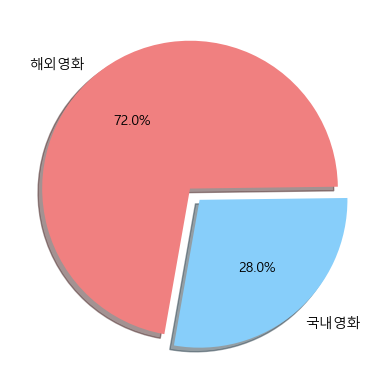

In [63]:
ratio = [8526, 3312]
labels = ['해외영화', '국내영화']
explode = [0.05, 0.05]
colors = ['#F08080', '#87CEFA']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [25]:
df_raw['국적'].value_counts()

0.0    484
1.0    430
Name: 국적, dtype: int64

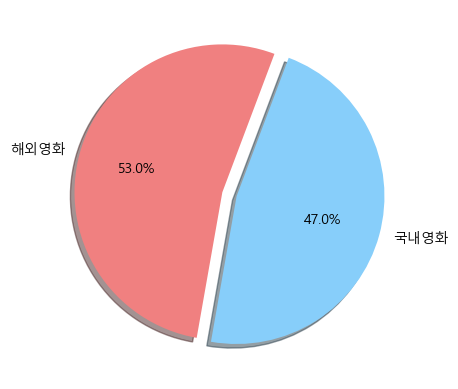

In [61]:
ratio = [484, 430]
labels = ['해외영화', '국내영화']
explode = [0.05, 0.05]
colors = ['#F08080', '#87CEFA']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [20]:
# 영화등급 분류 (청불, 15세이상, 12세이상, 전체)

# 0 : 청불, 1 : 15세이상, 2 : 12세이상, 3 : 전체
grade = {
    "청소년관람불가": "기타",
    "15세이상관람가": 1,
    "12세이상관람가": 2,
    "전체관람가": 3,
    "청소년관람불가,15세이상관람가" : 0,
    "12세이상관람가,15세이상관람가" : 1,
    "12세이상관람가,전체관람가" : 2,
    "15세이상관람가,전체관람가" : 1,
    "15세관람가" : 1,
    "15세관람가,12세이상관람가" : 1
}

df_ori['등급'] = df_ori['등급'].map(grade)

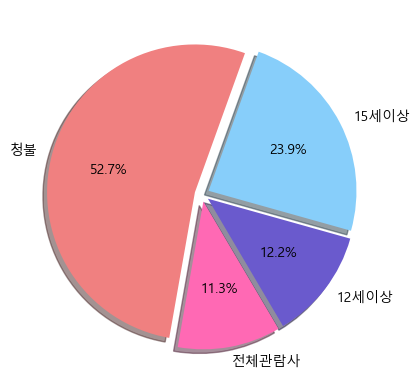

In [64]:
ratio = [6241, 2824, 1440, 1333]
labels = ['청불', '15세이상', '12세이상', '전체관람사']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#F08080', '#87CEFA','#6A5ACD', '#FF69B4']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [21]:
df_ori['등급'].value_counts()

0    6241
1    2824
2    1440
3    1333
Name: 등급, dtype: int64

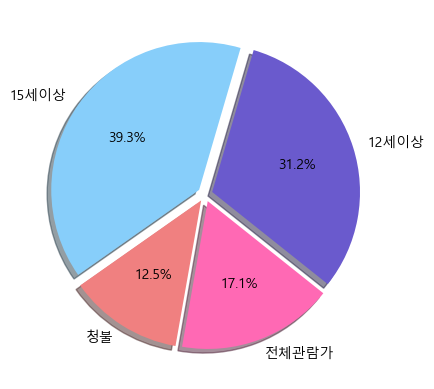

In [66]:
ratio = [114, 359, 285, 156]
labels = ['청불', '15세이상', '12세이상', '전체관람가']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#F08080', '#87CEFA','#6A5ACD', '#FF69B4']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [22]:
df_raw['등급'].value_counts()

1    359
2    285
3    156
0    114
Name: 등급, dtype: int64

In [125]:
df['전국매출액'] = df['전국매출액'] * 100000000

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 913
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   영화명         914 non-null    object 
 1   개봉일         914 non-null    object 
 2   국적          914 non-null    float64
 3   전국스크린수      914 non-null    int64  
 4   전국매출액       914 non-null    int64  
 5   전국관객수       914 non-null    int64  
 6   서울매출액       914 non-null    float64
 7   서울관객수       914 non-null    int64  
 8   장르          914 non-null    object 
 9   등급          914 non-null    int64  
 10  영화구분        914 non-null    int64  
 11  개봉연도        914 non-null    int64  
 12  평균 제작비      914 non-null    float64
 13  국내배급사       914 non-null    float64
 14  상장배급사       914 non-null    float64
 15  주요배급사       914 non-null    int64  
 16  개봉일관객수      914 non-null    float64
 17  개봉일매출액      914 non-null    float64
 18  개봉일매출비율     914 non-null    float64
 19  타겟          914 non-null    i

In [9]:
df_raw.columns

Index(['영화명', '개봉일', '국적', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '장르',
       '등급', '영화구분', '개봉연도', '평균 제작비', '국내배급사', '상장배급사', '주요배급사', '개봉일관객수',
       '개봉일매출액', '개봉일매출비율', '타겟', '배우가중치', '감독가중치', '로그 전국스크린수', '로그 전국매출액',
       '로그 서울매출액', '로그 전국관객수', '로그 서울관객수', '로그 개봉일관객수', '로그 개봉일매출액',
       '로그 개봉일매출비율', '로그 배우가중치', '로그 감독가중치'],
      dtype='object')

In [6]:
df_raw['로그 전국스크린수'] = np.log(df_raw['전국스크린수'])
df_raw['로그 전국매출액'] = np.log(df_raw['전국매출액'])
df_raw['로그 서울매출액'] = np.log(df_raw['서울매출액'])
df_raw['로그 전국관객수'] = np.log(df_raw['전국관객수'])
df_raw['로그 서울관객수'] = np.log(df_raw['서울관객수'])
df_raw['로그 개봉일관객수'] = np.log(df_raw['개봉일관객수'])
df_raw['로그 개봉일매출액'] = np.log(df_raw['개봉일매출액'])
df_raw['로그 개봉일매출비율'] = np.log(df_raw['개봉일매출비율'])
df_raw['로그 배우가중치'] = np.log(df_raw['배우가중치'])
df_raw['로그 감독가중치'] = np.log(df_raw['감독가중치'])

In [10]:
df_EDA = df_raw.drop(columns=['영화명', '개봉일', '국적', '장르', '등급', '영화구분', '개봉연도', '평균 제작비', '국내배급사', '상장배급사', '주요배급사', '타겟'])

In [12]:
df_EDA

,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,개봉일관객수,개봉일매출액,개봉일매출비율,배우가중치,감독가중치,로그 전국스크린수,로그 전국매출액,로그 서울매출액,로그 전국관객수,로그 서울관객수,로그 개봉일관객수,로그 개봉일매출액,로그 개봉일매출비율,로그 배우가중치,로그 감독가중치
0,1587,135748398910,17613682,3.312123e+10,4163666,682701.0,4.708879e+09,61.6,39.000000,2.000000,7.369601,25.634069,24.223440,16.684187,15.241906,13.433812,22.272716,4.120662,3.663562,0.693147
1,1978,139647979516,16264944,3.185866e+10,3638287,368582.0,3.004763e+09,73.2,21.000000,3.000000,7.589842,25.662391,24.184575,16.604523,15.107024,12.817418,21.823465,4.293195,3.044522,1.098612
2,1912,115698654137,14410754,2.753083e+10,3346172,406365.0,2.984151e+09,63.2,27.000000,3.000000,7.555905,25.474255,24.038572,16.483485,15.023328,12.915007,21.816581,4.146304,3.295837,1.098612
3,966,110828014630,14245998,2.584252e+10,3233946,184756.0,1.356870e+09,31.0,29.000000,1.000000,6.873164,25.431245,23.975287,16.471987,14.989214,12.126791,21.028446,3.433987,3.367296,0.000000
4,2835,122182694160,13934592,3.357714e+10,3597963,1338729.0,9.678990e+09,97.1,22.000000,3.000000,7.949797,25.528783,24.237111,16.449885,15.095878,14.107231,22.993223,4.575741,3.091042,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,425,2015360478,260721,7.222464e+08,90018,18404.0,1.352783e+08,5.6,0.333333,0.100000,6.052089,21.424064,20.397877,12.471206,11.407765,9.820323,18.722845,1.722767,-1.098612,-2.302585
910,445,2088685200,257716,4.114176e+08,50477,32277.0,2.502558e+08,13.1,0.633333,0.033333,6.098074,21.459801,19.835119,12.459613,10.829273,10.382110,19.337994,2.572612,-0.456758,-3.401197
911,168,2370348500,257193,8.800060e+08,87499,12613.0,1.180325e+08,7.5,0.033333,0.066667,5.123964,21.586303,20.595439,12.457582,11.379383,9.442483,18.586471,2.014903,-3.401197,-2.708050
912,401,1997947292,256475,6.057764e+08,75489,26707.0,1.993983e+08,5.8,0.233333,0.033333,5.993961,21.415386,20.222021,12.454786,11.231742,10.192681,19.110815,1.757858,-1.455287,-3.401197


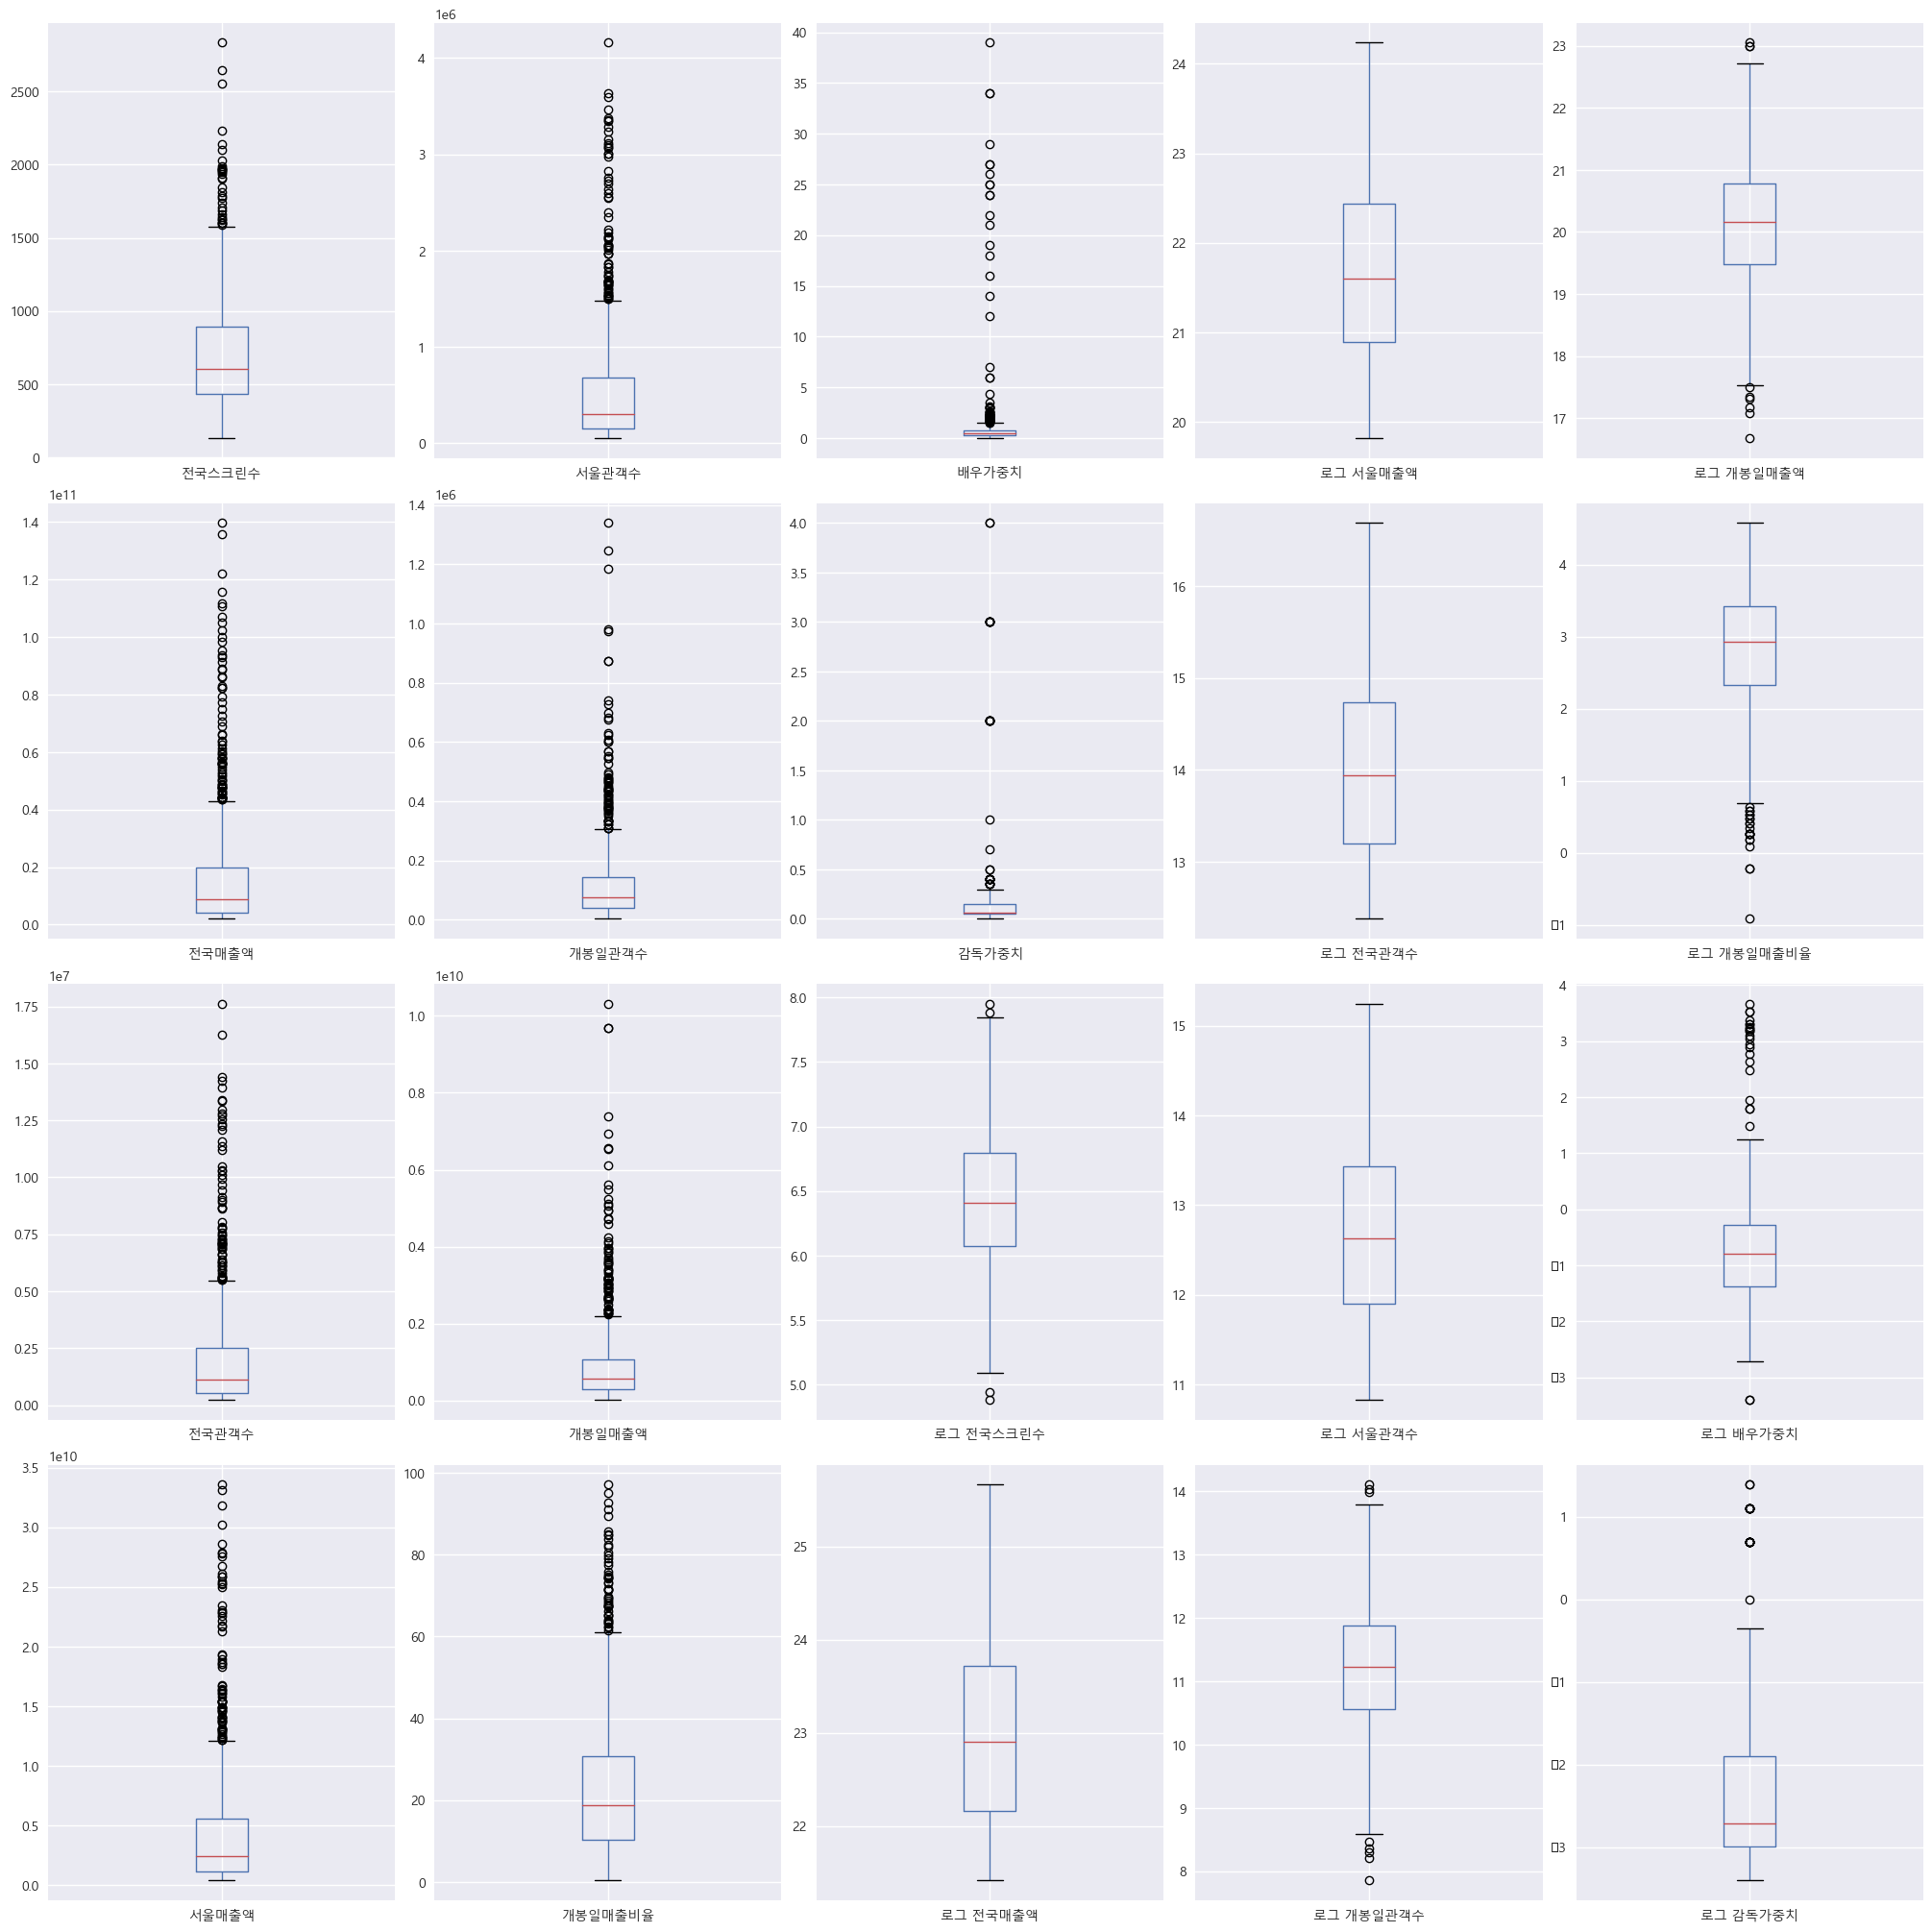

In [13]:
df_부실징후_outlier = df_EDA
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'

ncols = 5
nrows = 4

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((20, 20))

for col, ax in zip(df_부실징후_outlier.columns, axs.T.ravel()):
    df_부실징후_outlier[[col]].boxplot(ax=ax)
    
plt.show()

<AxesSubplot: xlabel='로그 개봉일매출비율', ylabel='Density'>

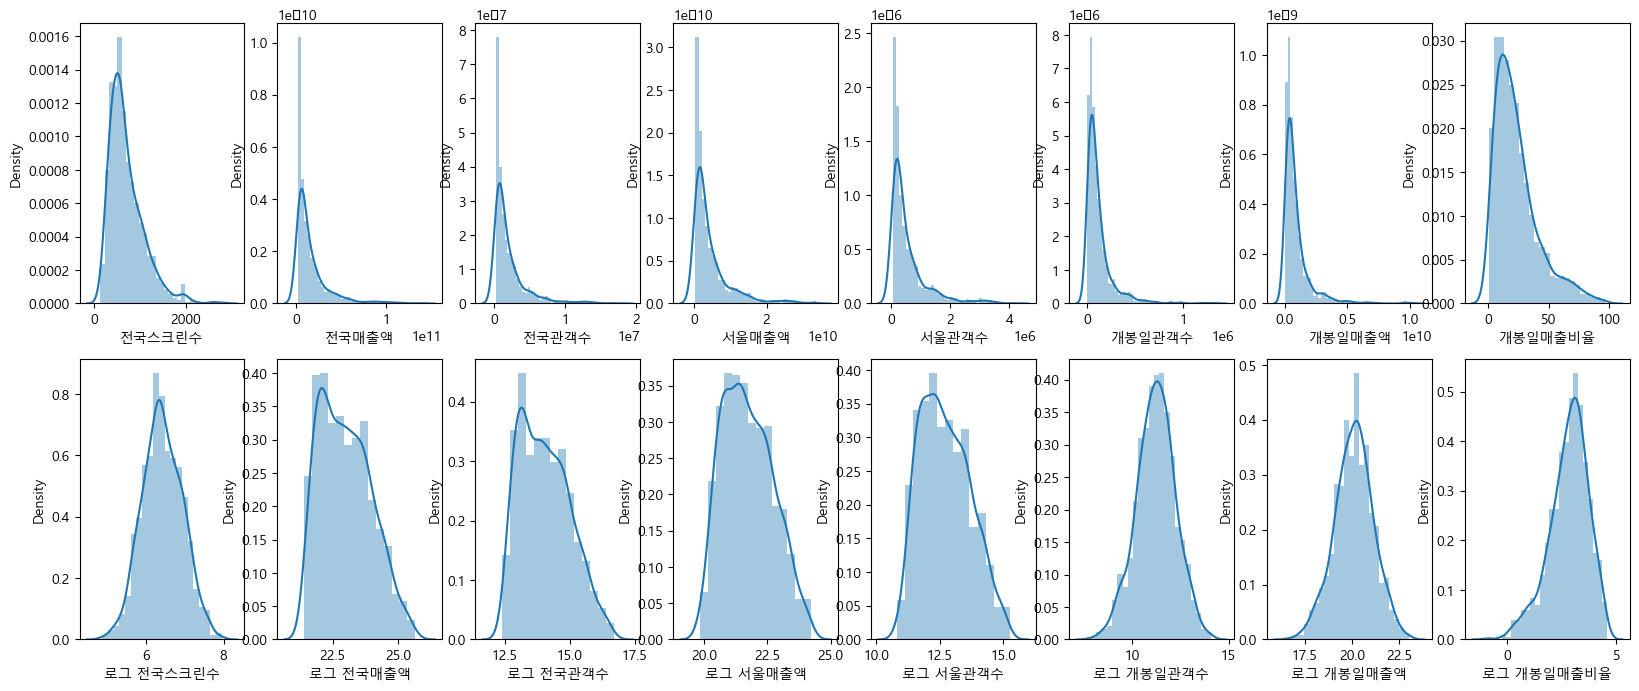

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(2,8,1)
sns.distplot(df_raw['전국스크린수'])
plt.subplot(2,8,2)
sns.distplot(df_raw['전국매출액'])
plt.subplot(2,8,3)
sns.distplot(df_raw['전국관객수'])
plt.subplot(2,8,4)
sns.distplot(df_raw['서울매출액'])
plt.subplot(2,8,5)
sns.distplot(df_raw['서울관객수'])
plt.subplot(2,8,6)
sns.distplot(df_raw['개봉일관객수'])
plt.subplot(2,8,7)
sns.distplot(df_raw['개봉일매출액'])
plt.subplot(2,8,8)
sns.distplot(df_raw['개봉일매출비율'])

plt.subplot(2,8,9)
sns.distplot(df_raw['로그 전국스크린수'])
plt.subplot(2,8,10)
sns.distplot(df_raw['로그 전국매출액'])
plt.subplot(2,8,11)
sns.distplot(df_raw['로그 전국관객수'])
plt.subplot(2,8,12)
sns.distplot(df_raw['로그 서울매출액'])
plt.subplot(2,8,13)
sns.distplot(df_raw['로그 서울관객수'])
plt.subplot(2,8,14)
sns.distplot(df_raw['로그 개봉일관객수'])
plt.subplot(2,8,15)
sns.distplot(df_raw['로그 개봉일매출액'])
plt.subplot(2,8,16)
sns.distplot(df_raw['로그 개봉일매출비율'])

In [33]:
df_raw['로그 배우가중치'] = np.log(df_raw['배우가중치'])
df_raw['로그 감독가중치'] = np.log(df_raw['감독가중치'])

In [38]:
df_raw.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

<AxesSubplot: xlabel='로그 감독가중치', ylabel='Density'>

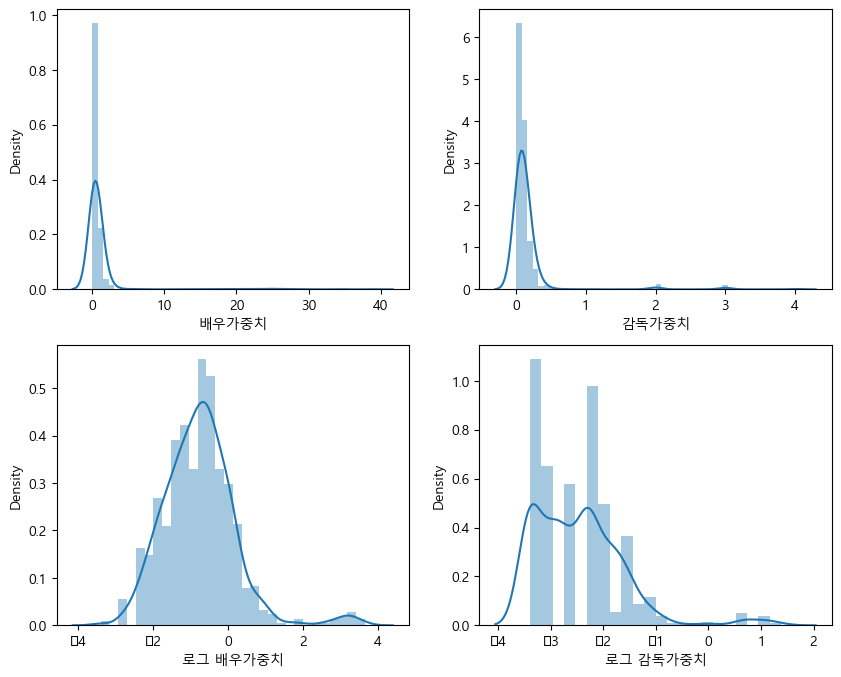

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(df_raw['배우가중치'])
plt.subplot(2,2,2)
sns.distplot(df_raw['감독가중치'])

plt.subplot(2,2,3)
sns.distplot(df_raw['로그 배우가중치'])
plt.subplot(2,2,4)
sns.distplot(df_raw['로그 감독가중치'])

In [28]:
drop_df = df_raw.dropna()

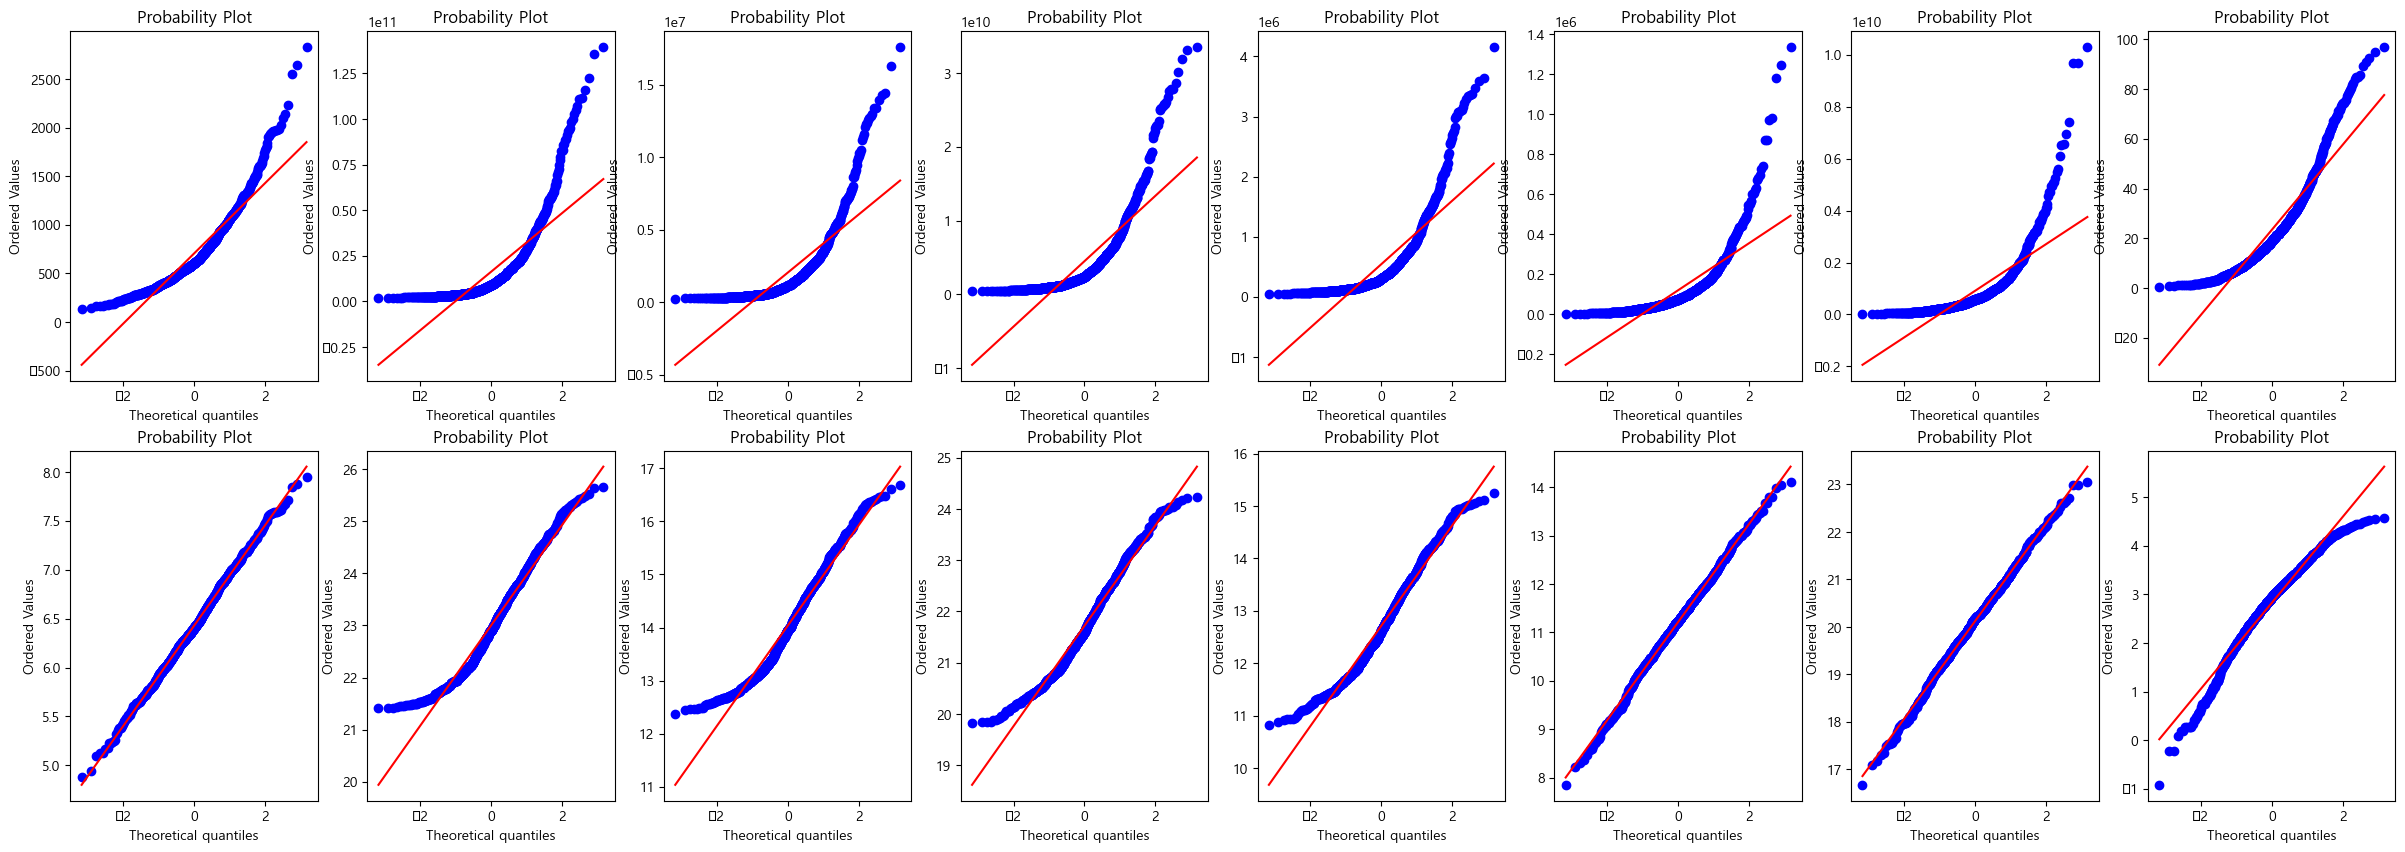

In [29]:
plt.figure(figsize=(30,10))
plt.subplot(2,8,1)
stats.probplot(df_raw['전국스크린수'], dist=stats.norm, plot=plt)
plt.subplot(2,8,2)
stats.probplot(df_raw['전국매출액'], dist=stats.norm, plot=plt)
plt.subplot(2,8,3)
stats.probplot(df_raw['전국관객수'], dist=stats.norm, plot=plt)
plt.subplot(2,8,4)
stats.probplot(df_raw['서울매출액'], dist=stats.norm, plot=plt)
plt.subplot(2,8,5)
stats.probplot(df_raw['서울관객수'], dist=stats.norm, plot=plt)
plt.subplot(2,8,6)
stats.probplot(df_raw['개봉일관객수'], dist=stats.norm, plot=plt)
plt.subplot(2,8,7)
stats.probplot(df_raw['개봉일매출액'], dist=stats.norm, plot=plt)
plt.subplot(2,8,8)
stats.probplot(df_raw['개봉일매출비율'], dist=stats.norm, plot=plt)

plt.subplot(2,8,9)
stats.probplot(df_raw['로그 전국스크린수'], dist=stats.norm, plot=plt)
plt.subplot(2,8,10)
stats.probplot(df_raw['로그 전국매출액'], dist=stats.norm, plot=plt)
plt.subplot(2,8,11)
stats.probplot(df_raw['로그 전국관객수'], dist=stats.norm, plot=plt)
plt.subplot(2,8,12)
stats.probplot(df_raw['로그 서울매출액'], dist=stats.norm, plot=plt)
plt.subplot(2,8,13)
stats.probplot(df_raw['로그 서울관객수'], dist=stats.norm, plot=plt)
plt.subplot(2,8,14)
stats.probplot(df_raw['로그 개봉일관객수'], dist=stats.norm, plot=plt)
plt.subplot(2,8,15)
stats.probplot(df_raw['로그 개봉일매출액'], dist=stats.norm, plot=plt)
plt.subplot(2,8,16)
stats.probplot(df_raw['로그 개봉일매출비율'], dist=stats.norm, plot=plt)
plt.show()

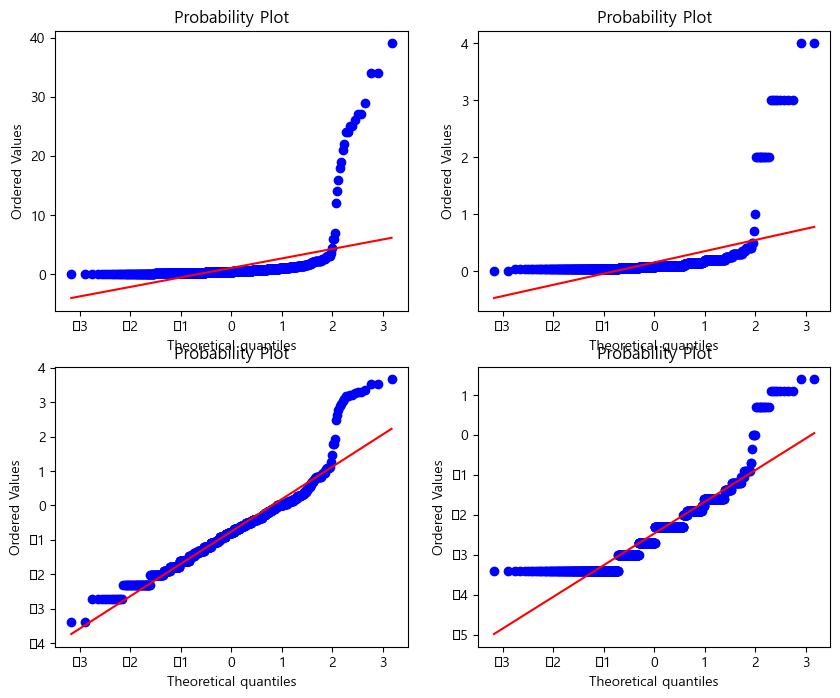

In [41]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
stats.probplot(df_raw['배우가중치'], dist=stats.norm, plot=plt)
plt.subplot(2,2,2)
stats.probplot(df_raw['감독가중치'], dist=stats.norm, plot=plt)
plt.subplot(2,2,3)
stats.probplot(df_raw['로그 배우가중치'], dist=stats.norm, plot=plt)
plt.subplot(2,2,4)
stats.probplot(df_raw['로그 감독가중치'], dist=stats.norm, plot=plt)
plt.show()

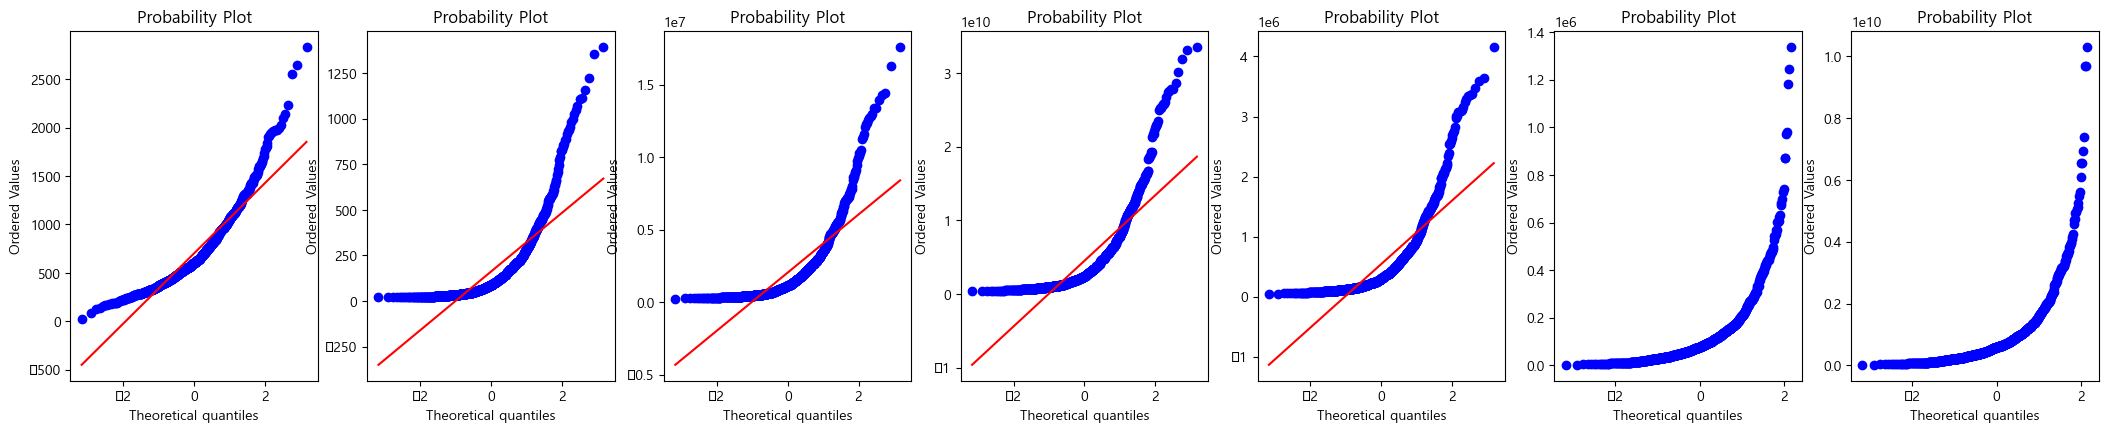

In [81]:
plt.figure(figsize=(30,10))
plt.subplot(2,8,1)
stats.probplot(df['전국 스크린수'], plot=plt)
plt.subplot(2,8,2)
stats.probplot(df['전국 매출액'], plot=plt)
plt.subplot(2,8,3)
stats.probplot(df['전국 관객수'], plot=plt)
plt.subplot(2,8,4)
stats.probplot(df['서울 매출액'], plot=plt)
plt.subplot(2,8,5)
stats.probplot(df['서울 관객수'], plot=plt)
plt.subplot(2,8,6)
stats.probplot(df['개봉일관객수'], plot=plt)
plt.subplot(2,8,7)
stats.probplot(df['개봉일매출액'], plot=plt)
plt.subplot(2,8,8)
stats.probplot(df['개봉일매출비율'], plot=plt)

plt.subplot(2,8,9)
stats.probplot(df['로그 전국 스크린수'], plot=plt)
plt.subplot(2,8,10)
stats.probplot(df['로그 전국 매출액'], plot=plt)
plt.subplot(2,8,11)
stats.probplot(df['로그 전국 관객수'], plot=plt)
plt.subplot(2,8,12)
stats.probplot(df['로그 서울 매출액'], plot=plt)
plt.subplot(2,8,13)
stats.probplot(df['로그 서울 관객수'], plot=plt)
plt.subplot(2,8,14)
stats.probplot(df['로그 개봉일관객수'], plot=plt)
plt.subplot(2,8,15)
stats.probplot(df['로그 개봉일매출액'], plot=plt)
plt.subplot(2,8,16)
stats.probplot(df['로그 개봉일매출비율'], plot=plt)
plt.show()

In [75]:
df = df.drop(['영화명', '개봉일', '국적', '장르', '등급', '영화구분', '개봉연도', '국내배급사', '상장배급사', '주요배급사', '타겟', '평균 제작비'], axis=1)

전국 스크린수
전국 매출액
전국 관객수
서울 매출액
서울 관객수
개봉일관객수
개봉일매출액
개봉일매출비율
로그 전국 스크린수
로그 전국 매출액
로그 서울 매출액
로그 전국 관객수
로그 서울 관객수
로그 개봉일관객수
로그 개봉일매출액
로그 개봉일매출비율


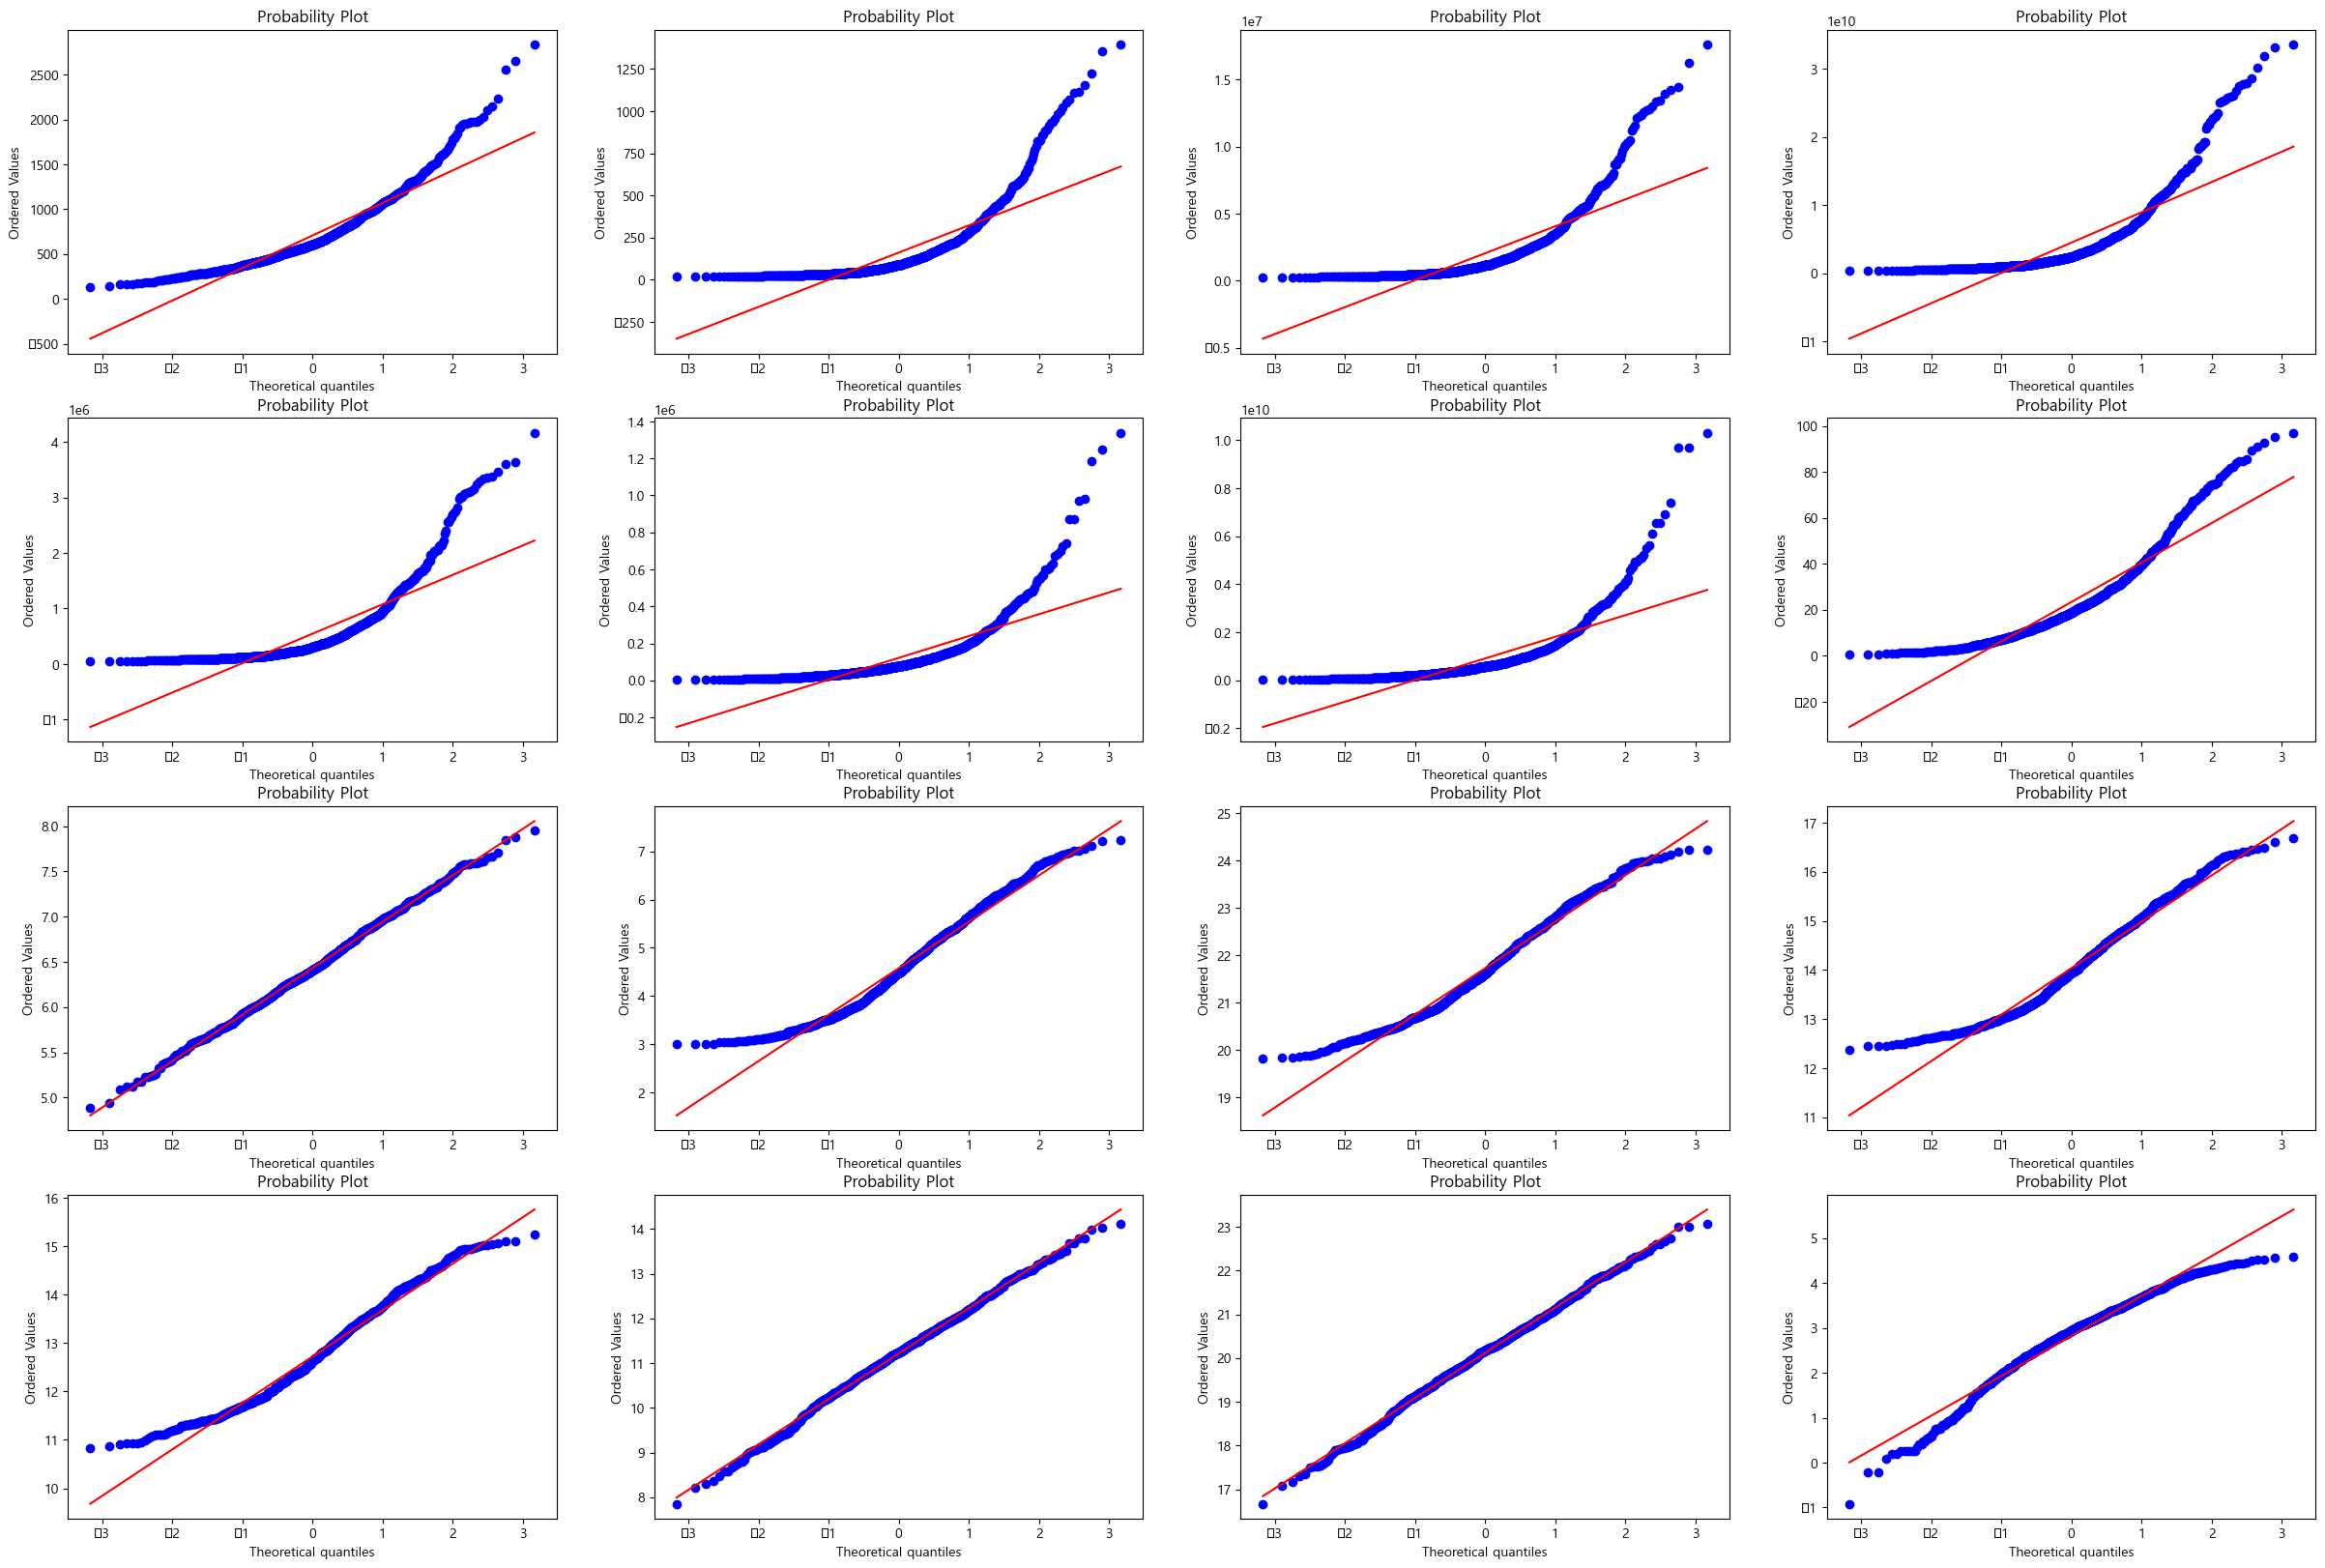

In [98]:
## histogram
col_n = 4
row_n = 4

# stats.probplot(df_drop["대비_국고1년"], dist=stats.norm, plot=plt)
# plt.show()
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df_drop.columns):
    stats.probplot(df_drop[col],dist=stats.norm, plot=ax[int(i/col_n),int(i%col_n)])
    print(col)
    


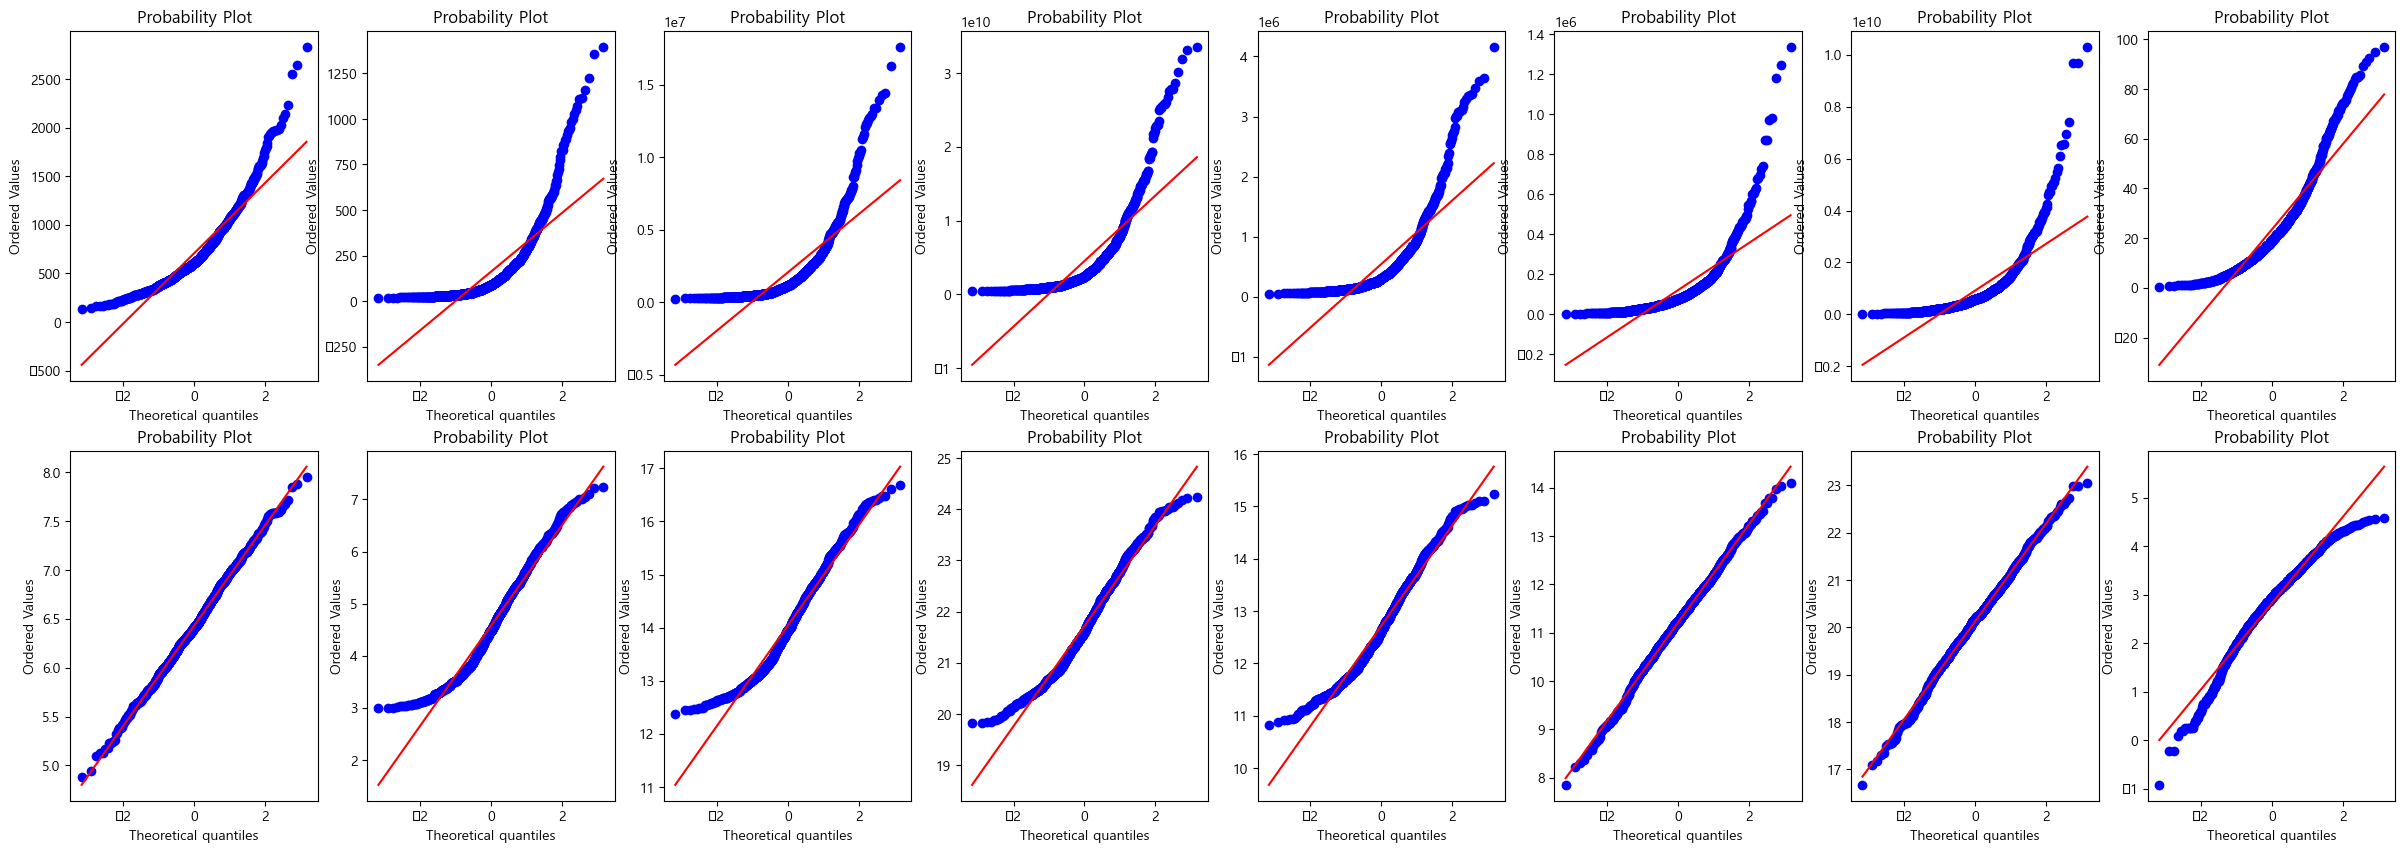

In [96]:
plt.figure(figsize=(30,10))
plt.subplot(2,8,1)
stats.probplot(df_drop['전국 스크린수'], plot=plt)
plt.subplot(2,8,2)
stats.probplot(df_drop['전국 매출액'], plot=plt)
plt.subplot(2,8,3)
stats.probplot(df_drop['전국 관객수'], plot=plt)
plt.subplot(2,8,4)
stats.probplot(df_drop['서울 매출액'], plot=plt)
plt.subplot(2,8,5)
stats.probplot(df_drop['서울 관객수'], plot=plt)
plt.subplot(2,8,6)
stats.probplot(df_drop['개봉일관객수'], plot=plt)
plt.subplot(2,8,7)
stats.probplot(df_drop['개봉일매출액'], plot=plt)
plt.subplot(2,8,8)
stats.probplot(df_drop['개봉일매출비율'], plot=plt)

plt.subplot(2,8,9)
stats.probplot(df_drop['로그 전국 스크린수'], plot=plt)
plt.subplot(2,8,10)
stats.probplot(df_drop['로그 전국 매출액'], plot=plt)
plt.subplot(2,8,11)
stats.probplot(df_drop['로그 전국 관객수'], plot=plt)
plt.subplot(2,8,12)
stats.probplot(df_drop['로그 서울 매출액'], plot=plt)
plt.subplot(2,8,13)
stats.probplot(df_drop['로그 서울 관객수'], plot=plt)
plt.subplot(2,8,14)
stats.probplot(df_drop['로그 개봉일관객수'], plot=plt)
plt.subplot(2,8,15)
stats.probplot(df_drop['로그 개봉일매출액'], plot=plt)
plt.subplot(2,8,16)
stats.probplot(df_drop['로그 개봉일매출비율'], plot=plt)
plt.show()

In [43]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 0 to 913
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   영화명         914 non-null    object 
 1   개봉일         914 non-null    object 
 2   국적          914 non-null    float64
 3   전국스크린수      914 non-null    int64  
 4   전국매출액       914 non-null    int64  
 5   전국관객수       914 non-null    int64  
 6   서울매출액       914 non-null    float64
 7   서울관객수       914 non-null    int64  
 8   장르          914 non-null    object 
 9   등급          914 non-null    int64  
 10  영화구분        914 non-null    int64  
 11  개봉연도        914 non-null    int64  
 12  평균 제작비      914 non-null    float64
 13  국내배급사       914 non-null    float64
 14  상장배급사       914 non-null    float64
 15  주요배급사       914 non-null    int64  
 16  개봉일관객수      914 non-null    float64
 17  개봉일매출액      914 non-null    float64
 18  개봉일매출비율     914 non-null    float64
 19  타겟          914 non-null    i

In [44]:
df_EDA = df_raw.drop(columns=['영화명','개봉일','장르'], axis=1)

In [45]:
from scipy import stats
from scipy.stats import shapiro

def Shapiro(df_EDA):
    Shapi = []
    Shapi.append([col for col in df_EDA])
    for i in Shapi:
        for j in i:
            shapiro_test,p_val = shapiro(df_EDA[j])
            print(j,"Test-statistics : {}, p-value : {}". format(shapiro_test,p_val))

Shapiro(df_EDA.iloc[:,:])

국적 Test-statistics : 0.635320782661438, p-value : 3.581074277520643e-40
전국스크린수 Test-statistics : 0.8877500295639038, p-value : 3.23852867009322e-25
전국매출액 Test-statistics : 0.6801403760910034, p-value : 2.5054336526692133e-38
전국관객수 Test-statistics : 0.68244868516922, p-value : 3.158343168489311e-38
서울매출액 Test-statistics : 0.7058534622192383, p-value : 3.5825914913939368e-37
서울관객수 Test-statistics : 0.7062832713127136, p-value : 3.751384953966121e-37
등급 Test-statistics : 0.8758141398429871, p-value : 2.3469100346158998e-26
영화구분 Test-statistics : 0.19131708145141602, p-value : 0.0
개봉연도 Test-statistics : 0.9406347274780273, p-value : 1.2033788396245413e-18
평균 제작비 Test-statistics : 0.8602230548858643, p-value : 1.0056375130819143e-27
국내배급사 Test-statistics : 0.6040492057800293, p-value : 2.363289860083804e-41
상장배급사 Test-statistics : 0.6364976167678833, p-value : 3.9813832098243135e-40
주요배급사 Test-statistics : 0.3831632137298584, p-value : 0.0
개봉일관객수 Test-statistics : 0.6585031747817993, p-valu

## SHAPLEY VALUE

In [ ]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(model_XGB)
shap_values = explainer.shap_values(X_train)
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [ ]:
shap.initjs()
# 총 13개 특성의 Shapley value를 절댓값 변환 후 각 특성마다 더함 -> np.argsort()는 작은 순서대로 정렬, 큰 순서대로 정렬하려면
# 앞에 마이너스(-) 기호를 붙임
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# 영향력 top 2 컬럼
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}  